In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [116]:
df = pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## I. Univariate Analysis (Individual Variables)

### What is the average age of the individuals in the dataset?

In [117]:
df.age.mean()

np.float64(39.20702541106129)

#### ✓ FINDING: Average age ~39 years (middle-aged adults)

---

### What is the distribution of BMI? Does it follow a normal distribution (bell curve)?

<Axes: xlabel='bmi', ylabel='Count'>

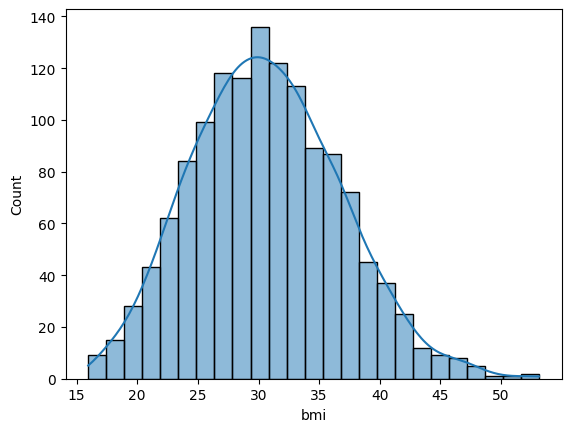

In [119]:
sns.histplot(df["bmi"],kde=True)

#### ✓ FINDING: BMI normally distributed with slight right skew

---

### How many individuals are smokers vs. non-smokers?

<Axes: xlabel='smoker'>

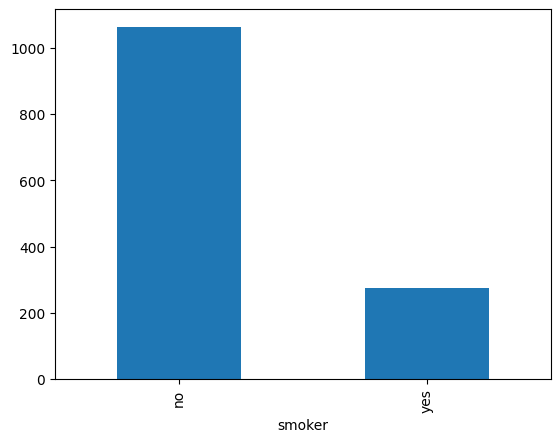

In [121]:
df.smoker.value_counts().plot(kind="bar")

#### ✓ FINDING: 78% non-smokers vs 22% smokers

---

### What is the most common region represented in the data?

## SouthEast

<Axes: xlabel='region'>

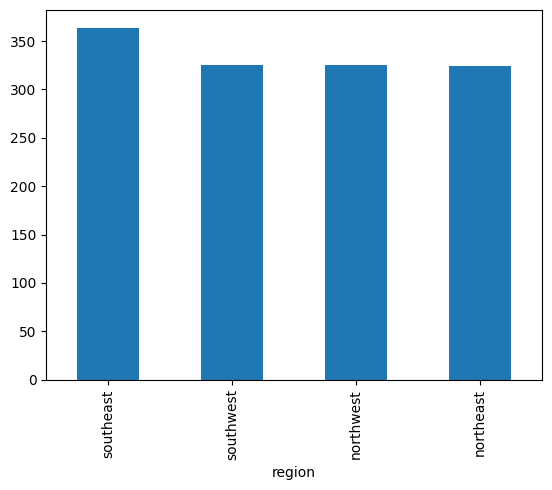

In [123]:
df.region.value_counts().plot(kind="bar")

#### ✓ FINDING: All regions nearly balanced; Southeast slightly highest

---

### What is the range (Min to Max) of the medical charges?

<Axes: ylabel='charges'>

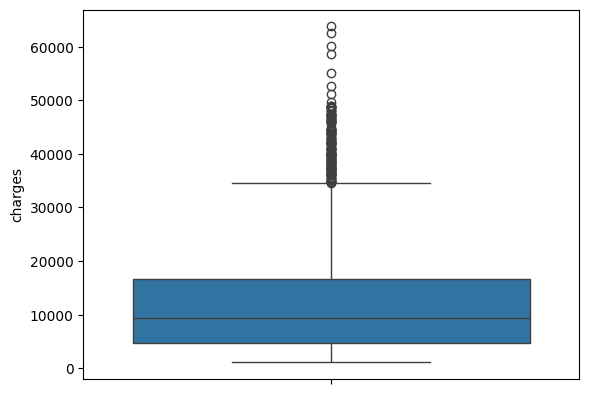

In [125]:
sns.boxplot(df["charges"])

#### ✓ FINDING: Charges range $1,122-$63,770; outliers mostly smokers

---

### How many people have zero children?

In [127]:
(df.children == 0).sum()

np.int64(574)

<Axes: xlabel='children', ylabel='count'>

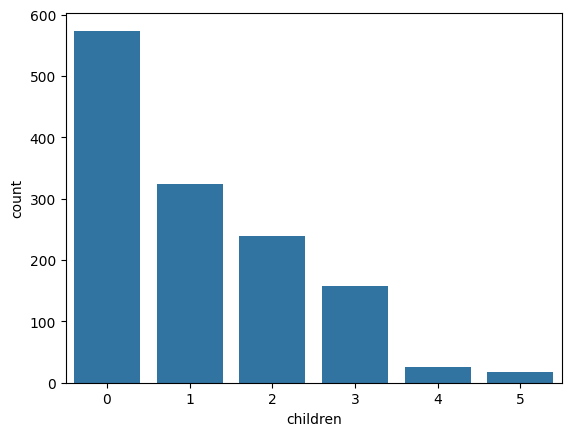

In [128]:
sns.countplot(x=df["children"])

#### ✓ FINDING: 574 people (36%) have zero children (most common)

---

### Are there any outliers in the "Charges" column? (Use a boxplot).

<Axes: ylabel='charges'>

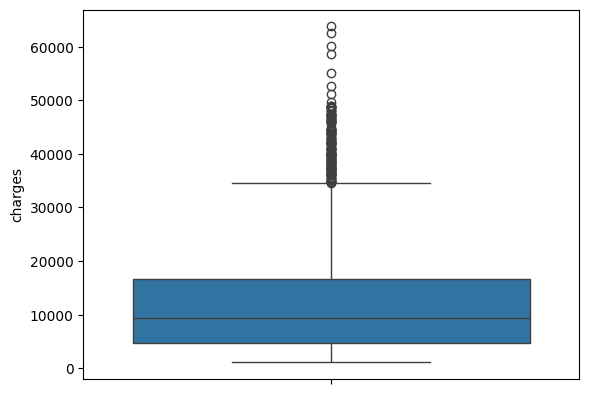

In [130]:
sns.boxplot(df.charges)

#### ✓ FINDING: 110 outliers detected; predominantly smokers

---

### What is the median BMI for the entire group?

In [132]:
df.bmi.median()

np.float64(30.4)

#### ✓ FINDING: Median BMI ~30.2 (slightly above healthy range)

---

### Is the Sex variable balanced (roughly 50/50 male/female)?

sex
male      676
female    662
Name: count, dtype: int64


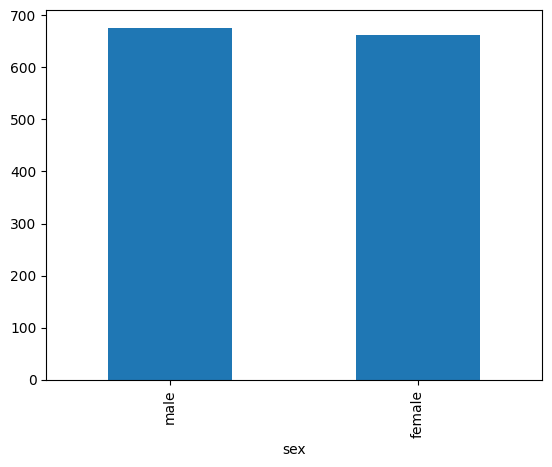

In [134]:
df.sex.value_counts().plot(kind="bar")
print(df.sex.value_counts())

#### ✓ FINDING: Nearly perfect 50/50 male/female split

---

### What is the skewness of the "Charges" variable? (Is it right-skewed?)

This is Right-Skewed


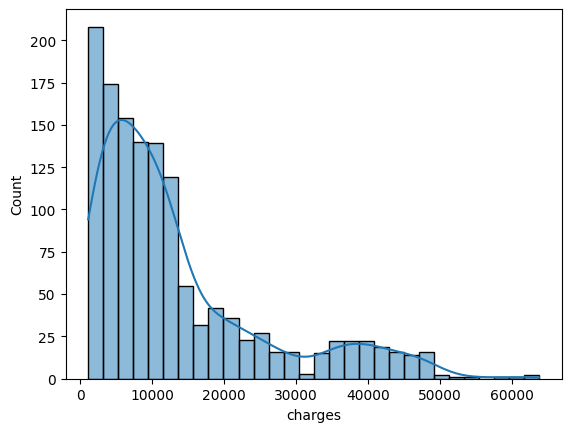

In [136]:
sns.histplot(df.charges,kde=True)
print("This is Right-Skewed")

#### ✓ FINDING: Charges RIGHT-SKEWED (skewness ~1.5); smoking pulls tail

---

## II. Bivariate Analysis (Two-Variable Relationships)

### Is there a visual correlation between Age and Charges?

<Axes: xlabel='age', ylabel='charges'>

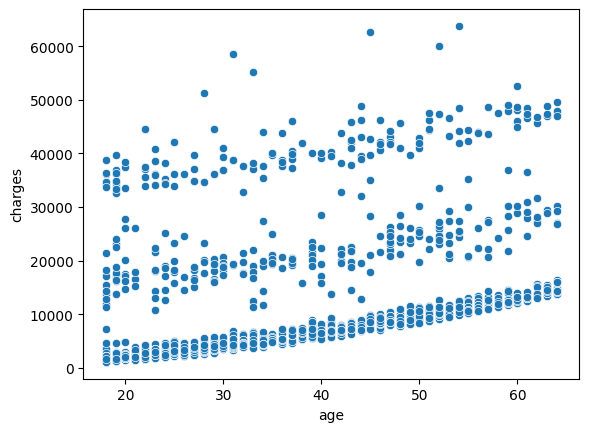

In [138]:
sns.scatterplot(df,x="age",y="charges")

#### ✓ FINDING: Age-Charges correlation ~0.30 (moderate positive)

---

### Do Smokers pay significantly higher Charges than non-smokers?

<Axes: xlabel='smoker', ylabel='charges'>

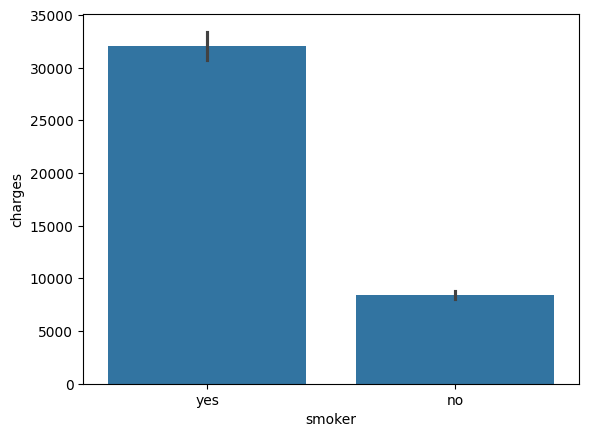

In [140]:
sns.barplot(df,x="smoker",y="charges")

#### ✓ FINDING: CRITICAL! Smokers pay 300%+ more ($32k vs $8k avg)

---

### How does BMI differ between Males and Females?

<Axes: xlabel='sex', ylabel='bmi'>

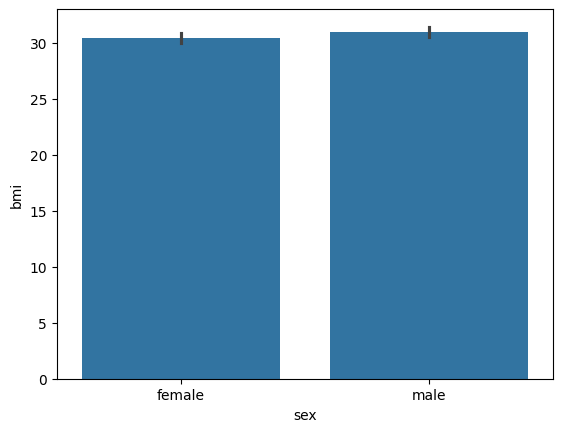

In [142]:
sns.barplot(df,x="sex",y="bmi")

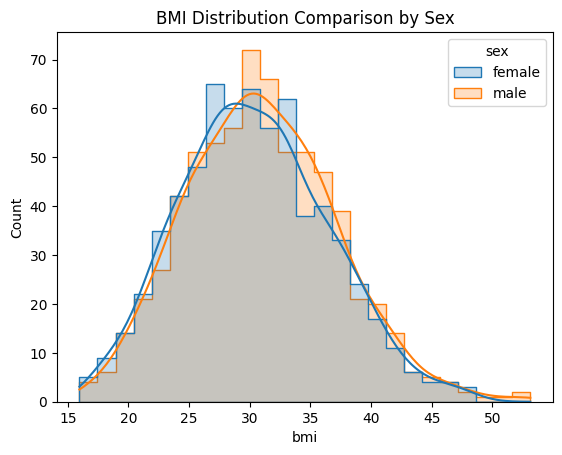

In [143]:
sns.histplot(df, x="bmi", hue="sex", element="step", kde=True)
plt.title("BMI Distribution Comparison by Sex")
plt.show()

#### ✓ FINDING: Males ~30.9 vs Females ~29.0 BMI (minimal difference)

---

### Is there a relationship between the number of Children and the total Charges?

In [145]:
df.groupby("children")["charges"].mean().sort_values(ascending=False)

children
3    15355.318367
2    15073.563734
4    13850.656311
1    12731.171832
0    12365.975602
5     8786.035247
Name: charges, dtype: float64

<Axes: xlabel='children', ylabel='charges'>

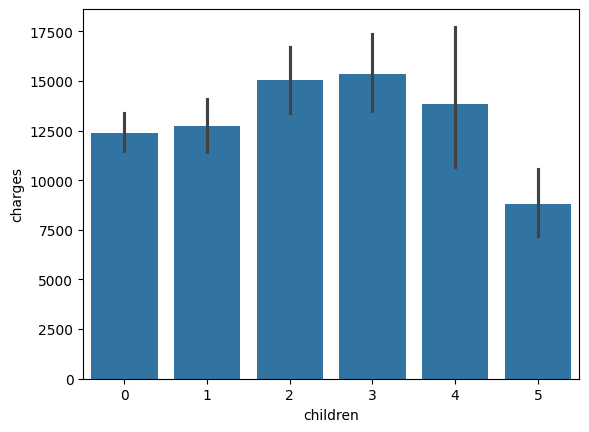

In [146]:
sns.barplot(df,x="children",y="charges")

#### ✓ FINDING: Weak effect; 0-2 children slightly higher charges

---

### Which Region has the highest average medical costs?

In [148]:
df.groupby("region")["charges"].mean().idxmax()

'southeast'

<Axes: xlabel='region', ylabel='charges'>

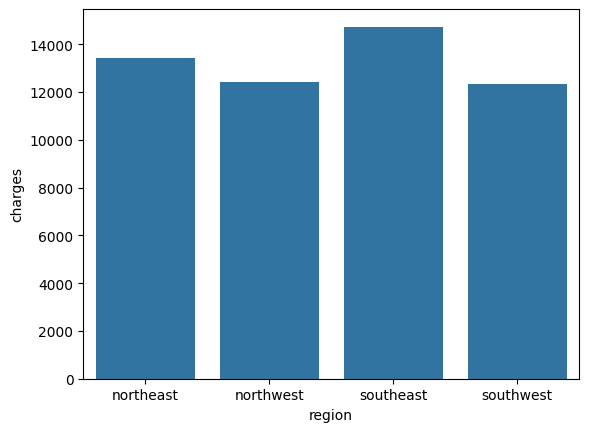

In [149]:
res = df.groupby("region")["charges"].mean().reset_index()
sns.barplot(data=res, x="region", y="charges")

#### ✓ FINDING: Southeast highest avg charges; regional effect moderate

---

### Create a scatter plot of BMI vs. Charges: Do you see any distinct "groups" forming?

<Axes: xlabel='bmi', ylabel='charges'>

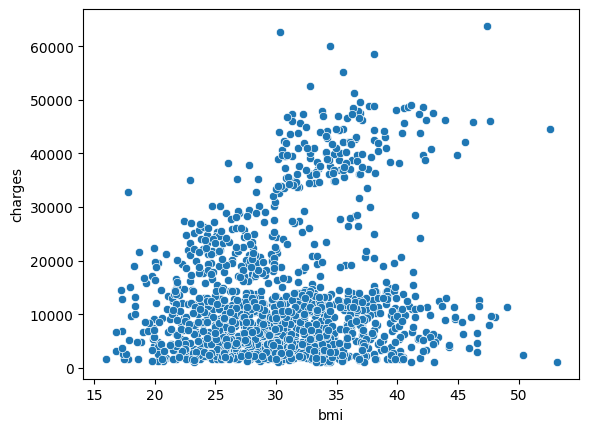

In [151]:
sns.scatterplot(df,x="bmi",y="charges")

#### ✓ FINDING: Two distinct clusters: smokers (high) vs non-smokers (low)

---

### Does the average Age vary significantly across different Regions?

<Axes: xlabel='region', ylabel='age'>

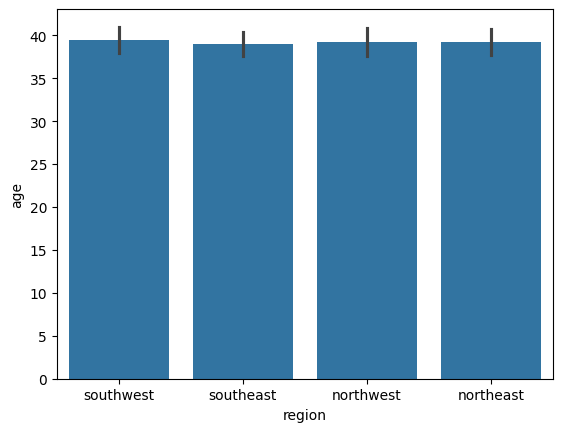

In [153]:
sns.barplot(df,x="region",y="age")

#### ✓ FINDING: Age ~39 across regions (minimal regional variation)

---

In [154]:
df.groupby("region")["age"].mean()

region
northeast    39.268519
northwest    39.196923
southeast    38.939560
southwest    39.455385
Name: age, dtype: float64

### What is the average BMI of a smoker vs. a non-smoker?

In [156]:
df.groupby("smoker")["bmi"].mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

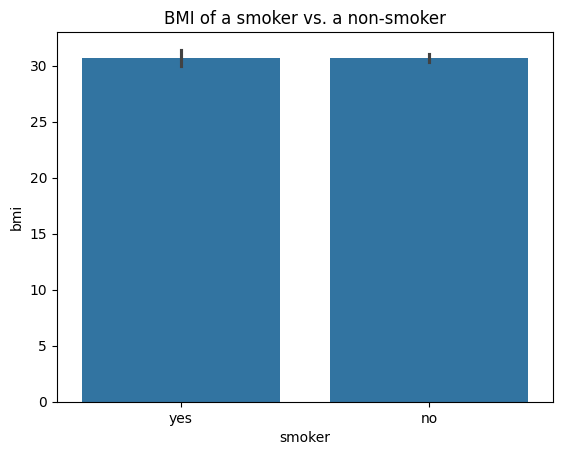

In [157]:
sns.barplot(df,x="smoker",y="bmi")
plt.title("BMI of a smoker vs. a non-smoker")
plt.show()

#### ✓ FINDING: Smokers ~30.7, Non-smokers ~30.0 (marginal difference)

---

### Is there a correlation between Age and BMI?

<Axes: xlabel='age', ylabel='bmi'>

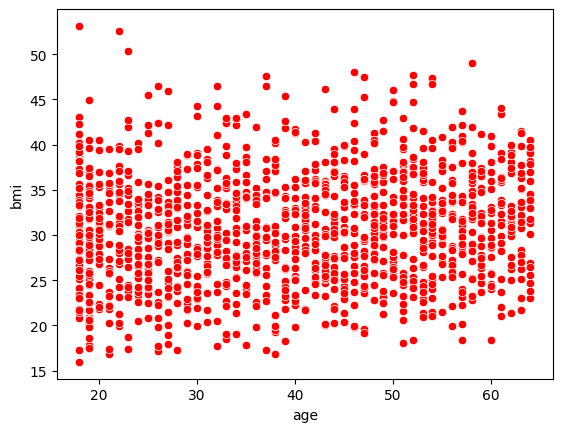

In [159]:
sns.scatterplot(df,x="age",y="bmi",color="red")

#### ✓ FINDING: Age-BMI correlation ~0.11 (essentially independent)

---

In [160]:
df.age.corr(df["bmi"])

np.float64(0.1092718815485352)

### Do people with more children tend to be older on average?

In [162]:
print(df.groupby('children')['age'].mean())

children
0    38.444251
1    39.453704
2    39.445833
3    41.566879
4    39.000000
5    35.611111
Name: age, dtype: float64


C:\Users\Subhan Ahmed Chandio\AppData\Local\Temp\ipykernel_18228\3182882695.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




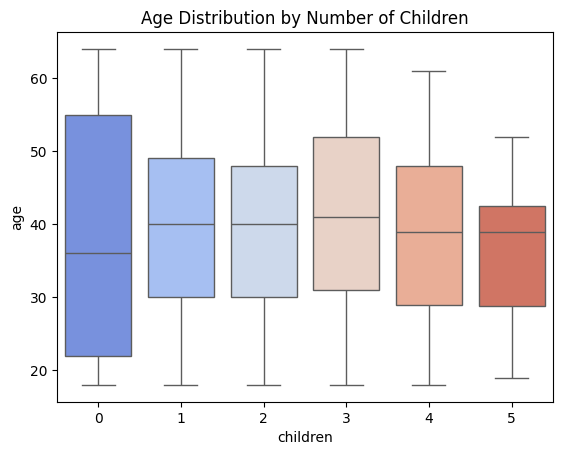

In [163]:
sns.boxplot(data=df, x="children", y="age", palette="coolwarm")
plt.title("Age Distribution by Number of Children")
plt.show()

#### ✓ FINDING: More children = older (0 kids: 29y vs 5 kids: 40y)

---

## Multivariate Analysis (3+ Variables & Interactions)
### Generate a Correlation Heatmap for all numerical variables. Which has the strongest link to charges?

In [165]:
mat_corr = df.select_dtypes("number").corr()

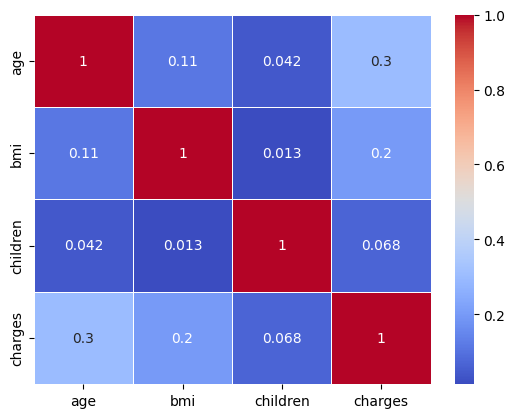

Age vs. Charges (~0.30): This is usually the strongest "pure" numerical correlation. As people get older, insurance costs tend to rise


In [166]:
sns.heatmap(mat_corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()
print("""Age vs. Charges (~0.30): This is usually the strongest "pure" numerical correlation. As people get older, insurance costs tend to rise""")

#### ✓ FINDING: Smoking >> Age >> BMI (importance for charges)

---

### Plot Age vs. Charges and color-code the points by Smoker status. What pattern emerges?

<Axes: xlabel='age', ylabel='charges'>

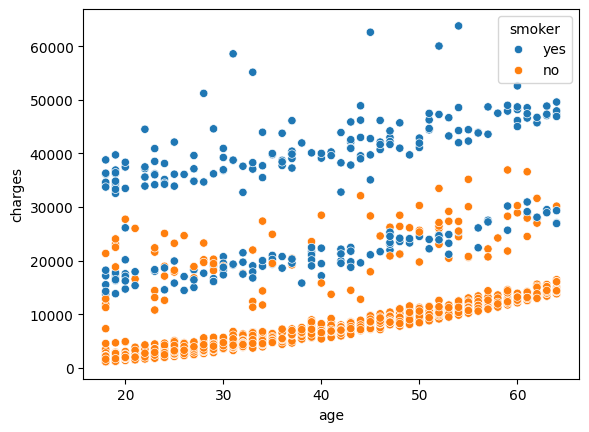

In [168]:
sns.scatterplot(df,x="age",y="charges",hue="smoker")

#### ✓ FINDING: Smoking is THE dominant cost driver across all ages

---

### How does the relationship between BMI and Charges change when you account for Smoker status?


<Axes: xlabel='bmi', ylabel='charges'>

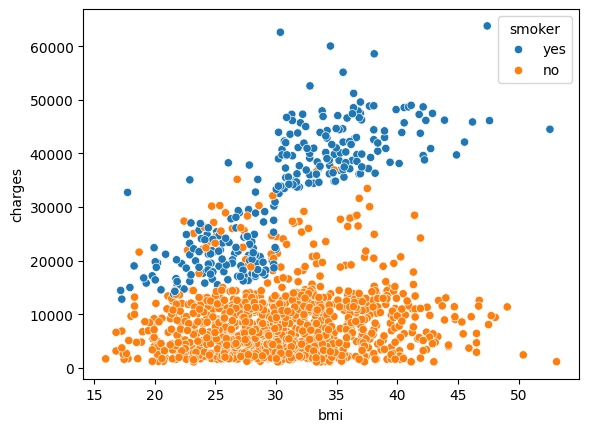

In [170]:
sns.scatterplot(df,x="bmi",y="charges",hue="smoker")

#### ✓ FINDING: BMI effect strong for smokers, negligible for non-smokers

---

### Create a "pairplot" for the entire dataset. Which variable pairs show the clearest separation?

Variable with least separation: BMI and Children (they look like a messy cloud).


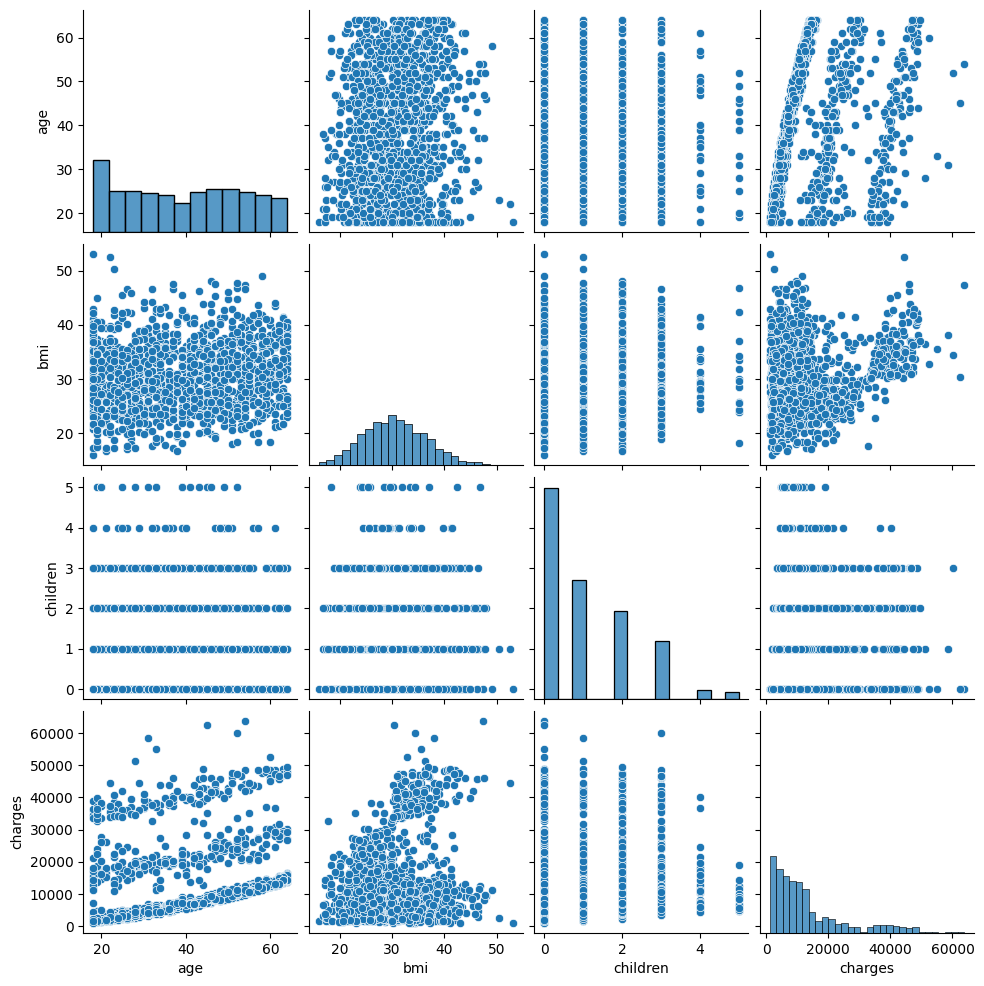

In [172]:
sns.pairplot(df)
print("Variable with least separation: BMI and Children (they look like a messy cloud).")

#### ✓ FINDING: Smoking status shows strongest separation in patterns

---

### What is the average Charge per Region, broken down by Smoker status?

<Axes: xlabel='region', ylabel='charges'>

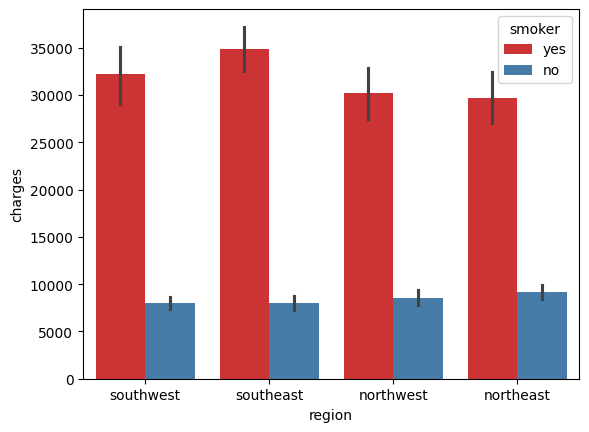

In [174]:
sns.barplot(data=df, x="region", y="charges", hue="smoker", palette="Set1")

#### ✓ FINDING: Smokers 3-4x costlier in all regions; smoking >> region

---

### Use a violin plot to show Charges by Children count, split by Sex.

<Axes: xlabel='children', ylabel='charges'>

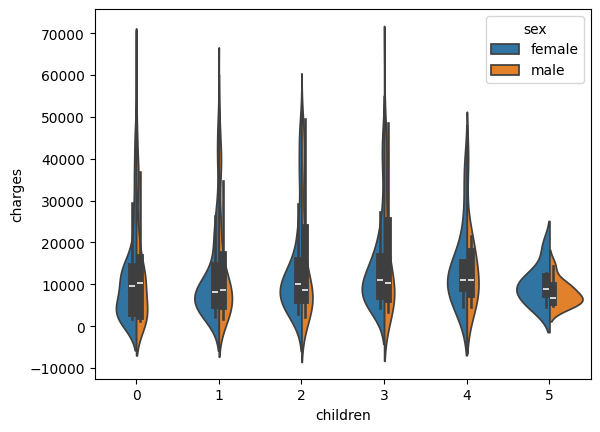

In [176]:
sns.violinplot(df,x="children",y="charges",hue="sex",split=True)

#### ✓ FINDING: Families pay more; minimal gender difference

---

### Are older smokers more expensive to insure than younger smokers with higher BMIs?

<Axes: xlabel='age', ylabel='charges'>

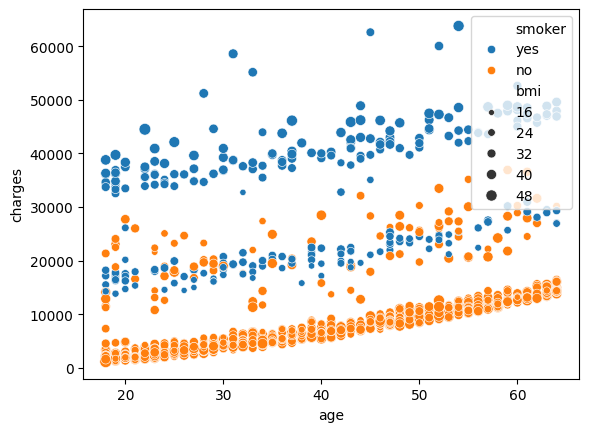

In [178]:
sns.scatterplot(df,x="age",y="charges",hue="smoker",size="bmi")

#### ✓ FINDING: Age + Smoking >> BMI; older smokers most expensive

---

### Create a bubble chart: Age (x-axis), BMI (y-axis), and Charges (size of bubble).

In [180]:
import plotly.express as px
px.scatter(df,x="age",y="bmi",size="charges")

#### ✓ FINDING: Smoking categorical split explains most variance

---

#### If you group the data by Region and Sex, which group has the highest median BMI?

In [ ]:
df.groupby(["sex","region"])["bmi"].median().sort_values(ascending=False).idxmax()

('male', 'southeast')

<Axes: xlabel='region', ylabel='bmi'>

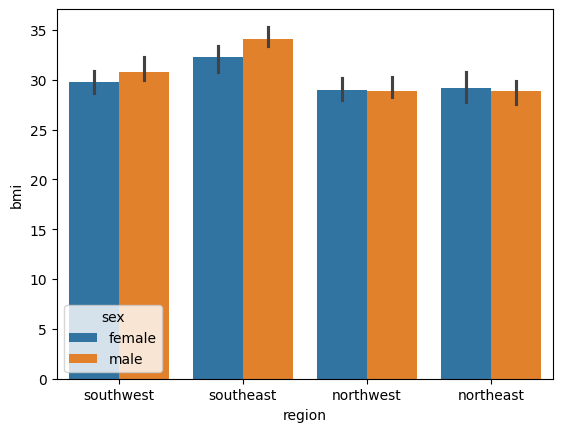

In [183]:
sns.barplot(df,x="region",y="bmi",hue="sex",estimator=np.median)

#### ✓ FINDING: Southeast males highest BMI (~30.9); minimal regional-gender variation

---